In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import  classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("telecom_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df["TotalCharges"].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.9        8
           ..
581.85      1
765.45      1
446.1       1
6589.6      1
4871.45     1
Name: TotalCharges, Length: 6531, dtype: int64

In [6]:
df["TotalCharges"].replace(" ",np.nan,inplace=True)

In [7]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [8]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [9]:
df = df.drop(["customerID"],axis=1)

In [10]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(['float64','int64'])

In [11]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [12]:
le = LabelEncoder()

In [13]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [14]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


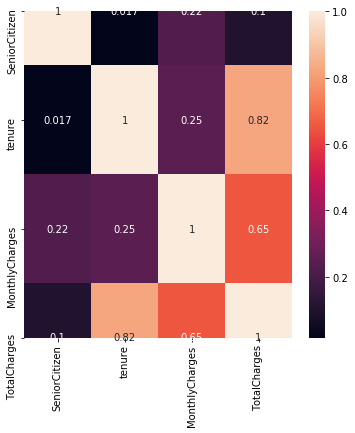

In [15]:
plt.figure(figsize = (6,6))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [16]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [17]:
df_new = pd.concat([df_num,df_cat],axis=1)

In [18]:
df_new

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,72,103.20,7362.90,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,4,74.40,306.60,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [19]:
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [20]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [22]:
def classify(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))

In [23]:
lr = LogisticRegression()

In [24]:
classify(lr)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2098
           1       0.64      0.55      0.59       720

    accuracy                           0.81      2818
   macro avg       0.75      0.72      0.73      2818
weighted avg       0.80      0.81      0.80      2818



In [26]:
dt = DecisionTreeClassifier()
classify(dt)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2098
           1       0.48      0.52      0.50       720

    accuracy                           0.73      2818
   macro avg       0.66      0.66      0.66      2818
weighted avg       0.74      0.73      0.74      2818



SeniorCitizen


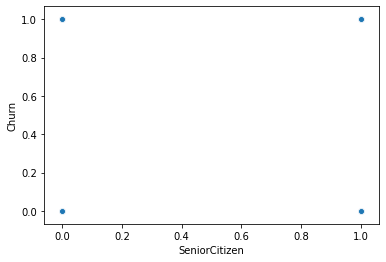

-----------------------------------------------
tenure


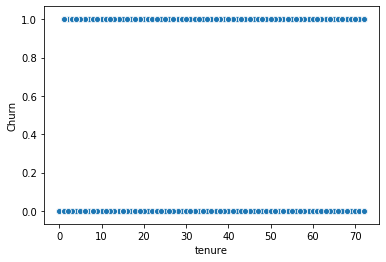

-----------------------------------------------
MonthlyCharges


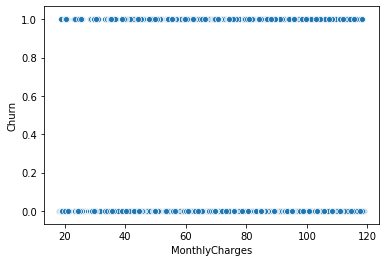

-----------------------------------------------
TotalCharges


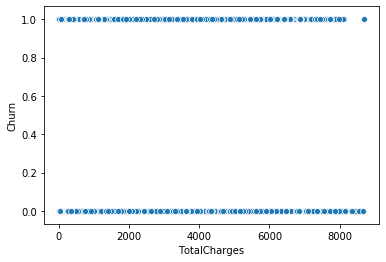

-----------------------------------------------
gender


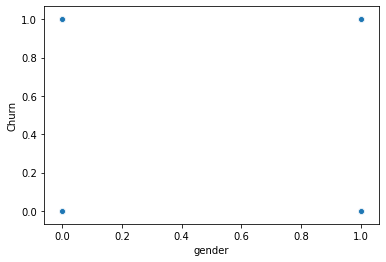

-----------------------------------------------
Partner


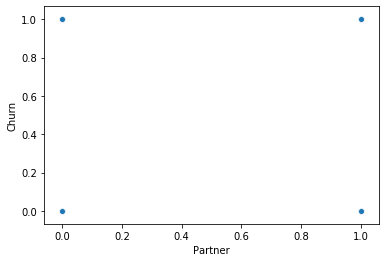

-----------------------------------------------
Dependents


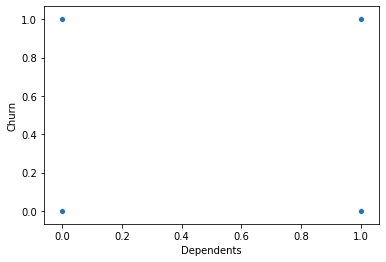

-----------------------------------------------
PhoneService


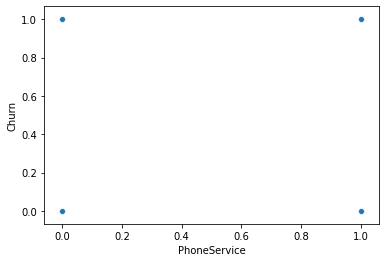

-----------------------------------------------
MultipleLines


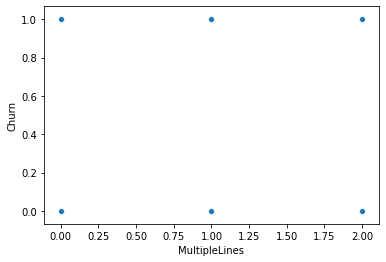

-----------------------------------------------
InternetService


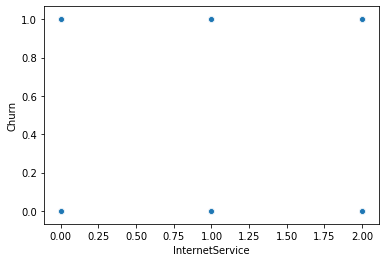

-----------------------------------------------
OnlineSecurity


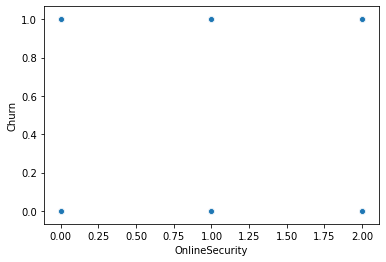

-----------------------------------------------
OnlineBackup


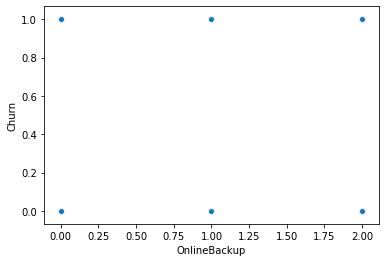

-----------------------------------------------
DeviceProtection


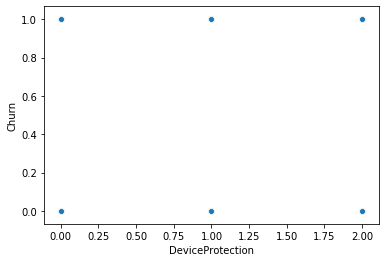

-----------------------------------------------
TechSupport


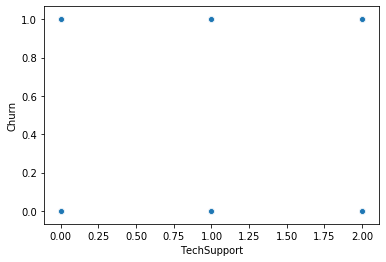

-----------------------------------------------
StreamingTV


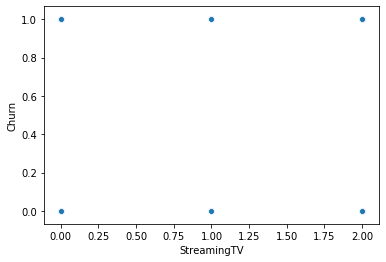

-----------------------------------------------
StreamingMovies


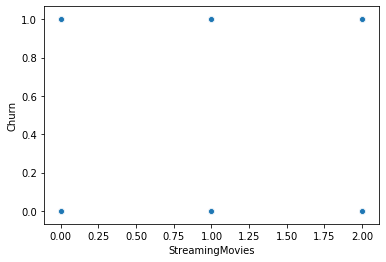

-----------------------------------------------
Contract


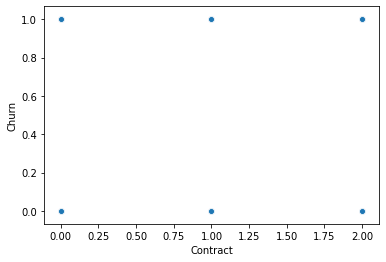

-----------------------------------------------
PaperlessBilling


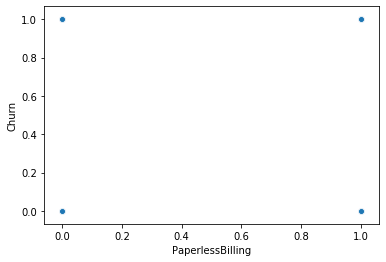

-----------------------------------------------
PaymentMethod


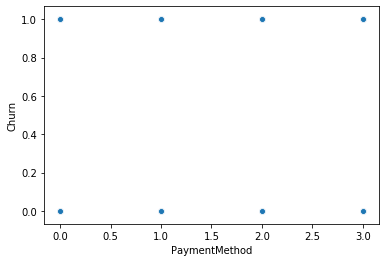

-----------------------------------------------
Churn


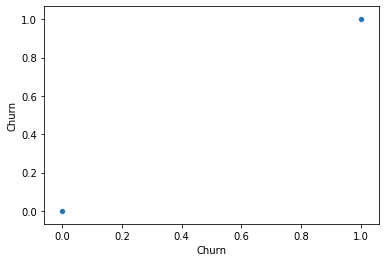

-----------------------------------------------


In [27]:
for col in df_new:     # to get scatter plot of all the required columns
    try:
        print(col)
        plt.figure()
        sns.scatterplot(data = df_new,y="Churn",x=col)
        plt.show()
    except:
        pass
    print("-----------------------------------------------")

In [28]:
from sklearn.utils import resample

# Separate input features and target
y = df_new.Churn
X = df_new.drop('Churn', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_Churn = X[X.Churn==0]
Churn = X[X.Churn==1]

# upsample minority
Churn_upsampled = resample(Churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_Churn), # match number in majority class
                          random_state=1) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_Churn, Churn_upsampled])

# check new class counts
upsampled.Churn.value_counts()


1    3847
0    3847
Name: Churn, dtype: int64

In [29]:
upsampled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
6463,0,59,69.10,4096.90,1,1,0,1,2,0,2,0,0,2,0,2,1,1,3,0
4356,0,3,18.80,56.00,0,0,0,1,0,2,1,1,1,1,1,1,0,0,3,0
6222,0,66,89.40,5976.90,1,0,0,1,2,1,0,2,0,0,0,2,0,0,1,0
2584,0,58,65.25,3791.60,0,1,0,1,0,0,2,2,0,0,2,0,0,1,1,0
6923,0,53,74.10,3833.95,0,1,0,1,2,0,2,2,2,0,0,2,1,0,0,0


In [30]:
X = upsampled.iloc[:,:-1]
y = upsampled.iloc[:,-1]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [32]:
def classify(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))

In [33]:
lr = LogisticRegression()

In [34]:
classify(lr)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1528
           1       0.75      0.80      0.77      1550

    accuracy                           0.76      3078
   macro avg       0.77      0.76      0.76      3078
weighted avg       0.77      0.76      0.76      3078



In [35]:
dt = DecisionTreeClassifier()

In [36]:
classify(dt)

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1528
           1       0.81      0.89      0.85      1550

    accuracy                           0.84      3078
   macro avg       0.84      0.84      0.84      3078
weighted avg       0.84      0.84      0.84      3078

